## Instructions

This notebook consists of 5 parts.  The point-value of each part is indicated in the section header.

Some executable cells have code, while other executable cells have a comment 'Challenge Cell' and a point value.

The executable cells with code are not worth any points, but must be executed to successfully complete and execute the challenge cells.

In [ ]:
# Execute this cell to load the necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Part 1: Pre-Midterm (Modules 01-06)
Total Part Value: 10 Points

## Challenge: NLP Pipeline (8 Points)

The twenty newsgroups dataset will be used for this lab. It is already loaded in the sklearn library.

In [ ]:
# Execute this cell to load the necessary data
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
count_vect = CountVectorizer()
print("twenty_train ready")

twenty_train ready


In [ ]:
# Fit the Data (2.0 Points)
# Fit the twenty_train.data to CountVectorizer and store it in a variable X_train_counts, and print the shape
# your code here.


(11314, 130107)

Now, let us obtain the tfidf features from the text.

In [ ]:
# Calculate TF-IDF (2.0 Points)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit the data to TfidfTransformer and store it in a variable X_train_tfidf, and print the shape
# your code here.


(11314, 130107)

Now, we will use the Naive Bayes classifier to classify text. It is also available in the sklearn library.

In [ ]:
# Create Naive Bayes Classifier (execute this cell)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)
clf

MultinomialNB()

The Pipeline function is available in the Sklearn library. It takes the different steps of the pipeline one by one:

- ('vect', CountVectorizer()),
- ('tfidf', TfidfTransformer()),
- ('clf', MultinomialNB())

In [ ]:
# Create Pipeline for MultinomialNB (execute this cell)
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
text_clf

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
# Fit Pipeline (execute this cell)
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
text_clf

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
# Evaluate Bayes Predictions (execute this cell)
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.7738980350504514

You are given the following chronological steps of the pipeline:

- ('vect', CountVectorizer())
- ('tfidf', TfidfTransformer())
- ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))

Now, your task is to design the <b>pipeline</b>

In [ ]:
# Create the Pipeline for SVM using SGD (2.0 Points)
from sklearn.linear_model import SGDClassifier
# Similar to 'Create Pipeline for MultinomialNB', design the pipeline using SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42)
# and store it in a variable text_clf_svm
# your code here


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf-svm',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42))])

In [ ]:
# Evaluate SVM Predictions (1.0 Points)
text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)
# Similar to 'Bayes Predictions' (above),  predict the labels for twenty_test data
# Specifically, use the function text_clf_svm.predict, the test data can be referenced by twenty_test.data
# your code here

# prediction accuracy
# your code here


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8248805098247477

Question: (1 Point) Compare the accuracy of the Naive Bayes vs. the SVM Classifier

In [ ]:
# Question: 1 Point

##Challenge: Define a sequential model

In [ ]:
# Execute this cell
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras import Sequential

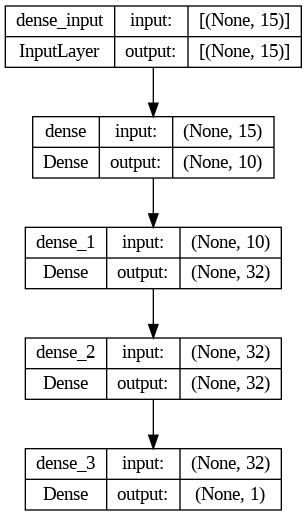

In [ ]:
# The model you need to make (2 Points)
# fill in the parameters so that you can create the model above
model = _____ # initialize sequential model
model.add(Dense(units = ____, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 15)) # Dense layer with 10 Neurons
model.add(Dense(units = ____, kernel_initializer = 'uniform', activation = 'tanh')) # Dense layer with 32 Neurons
model.add(Dense(units = ____, kernel_initializer = 'uniform', activation = 'tanh')) # Dense layer with 32 Neurons
model.add(Dense(units = ____, kernel_initializer = 'uniform', activation = '_______')) # Dense output layer with 1 neuron, sigmoid activation
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Part 2: Recurrent Neural Network (Modules 08)
Total Part Value: 10 Points

## Challenge: Bag of Words


Generate the vectors for the following sentences using Bag of Words approach:
*   Here we go again
*   Go and play baseball
*   Baseball and tennis are popular here

In [ ]:
# Execute this cell to create the data and helper functions

docs = [
    'Here we go again',
    'Go and play baseball',
    'Baseball and tennis are popular here'
]
tokenized_docs = [sentence.split() for sentence in docs]
vocab = [word.lower() for sentence in tokenized_docs for word in sentence]
def vectorize(sentence):
  vectorized = [0] * len(vocab)

  i = 0
  for token in sentence.split():
    vectorized[vocab.index(token.lower())] += 1
    i += 1
  return vectorized

In [ ]:
# Vectorize the sentences (2.0 Points)


['here', 'we', 'go', 'again', 'go', 'and', 'play', 'baseball', 'baseball', 'and', 'tennis', 'are', 'popular', 'here']
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]


## Designing Neural Networks


We have given you the image of a model and its layers. The code is partially made for you. Your task is to fill in the blanks in the code block to create an exact same model.

In [ ]:
from keras.layers import SimpleRNN, Dense, LSTM
from keras.layers import Bidirectional

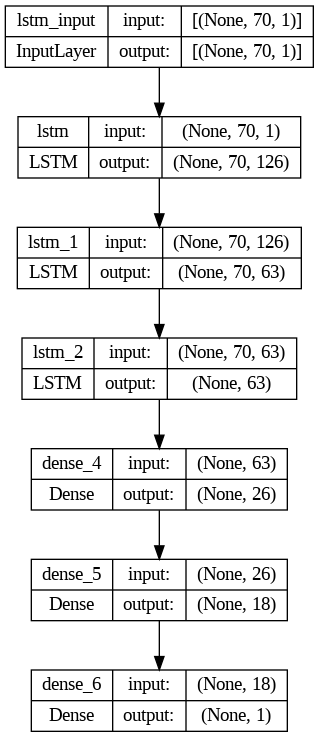

In [ ]:
# Complete the Neural Network Model (4.0 Points)
# The model you need to make
# fill in the parameters so that you can create the model below
model = _____ # initialize sequential model
model.add(LSTM(____, input_shape=(70,1), return_sequences=True)) # LSTM layer with 126 neurons
model.add(LSTM(____, return_sequences=True)) # LSTM layer with 63 neurons
model.add(LSTM(____)) # LSTM layer with 63 neurons
model.add(Dense(____,activation='relu')) # Dense layer with 26 neurons
model.add(Dense(18,activation='____')) # Dense layer with 18 neurons, relu activation
model.add(Dense(____,activation='____')) # Dense output layer with 1 neuron, relu activation
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Bidirectional RNN
- Design a sequential model that takes an input vector of shape (10,20)
- Add a bidirectional LSTM layer of 25 neurons
- Add another bidirectional LSTM layer of 15 neurons
- Add a dense layer of 10 neurons

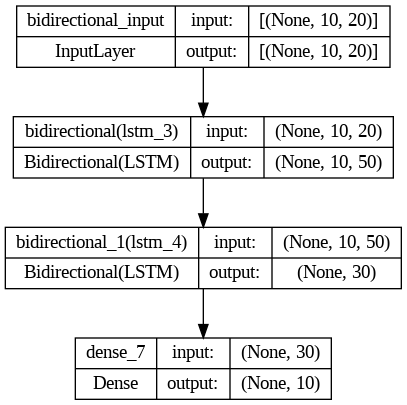

In [ ]:
# Implement the Neural Network Model (4.0 Points)


# Part 3: Model Deployment (Module 09)
Total Part Value: 5 Points

##Simulating Streamlit
In Module09, we used Streamlit to select a classification algorithm.
Your task is to use the code snippets below to implement the same functionality in this Jupyter Notebook, but using input provided by the 'input()' method instead of the Streamlit User Interface elements.

```
  # Code Snippet #1
  trainData = fetch_20newsgroups(subset='train', shuffle=True)
  print("SVM selected")
  classificationPipeline = Pipeline([('bow', CountVectorizer()), ('vector', TfidfTransformer()), ('classifier', SGDClassifier(loss='hinge', penalty='l1', alpha=0.0005, l1_ratio=0.17))])
  #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
  classificationPipeline = classificationPipeline.fit(trainData.data, trainData.target)
  test_set = fetch_20newsgroups(subset='test', shuffle=True)
  dataPrediction = classificationPipeline.predict(test_set.data)
  print("SVM:")    
  print(np.mean(dataPrediction == test_set.target))
```



```
  # Code Snippet #2
  trainData = fetch_20newsgroups(subset='train', shuffle=True)
  print("Naive Bayes selected")
  classificationPipeline = Pipeline([('bow', CountVectorizer()), ('vector', TfidfTransformer()), ('classifier', MultinomialNB())])
  classificationPipeline = classificationPipeline.fit(trainData.data, trainData.target)
  test_set = fetch_20newsgroups(subset='test', shuffle=True)
  dataPrediction = classificationPipeline.predict(test_set.data)
  print("Accuracy of Naive Bayes:")
  print(np.mean(dataPrediction == test_set.target))
```



In [ ]:
# Execute this cell to retrieve the user's desired classification method
cs = ["Naive Bayes","SVM"]
print("Pick a classification method:")
for option in cs:
  print(f"\t {option}")

classification_space = input()

Pick a classification method:
	 Naive Bayes
	 SVM
SVM


In [ ]:
# Implement the correct Code Snippet based on the user's choice (5.0 Points)
if classification_space == "Naive Bayes":
  # Logic to calculate Naive Bayes

if classification_space == "SVM":
  # Logic to calculate SVM


SVM selected
SVM:
0.6011683483802442


# Part 4: Chatbots (Module 10)
Total Part Value: 5 Points

##Customize a Chatbot

In [ ]:
# Execute this code to create a chatbot
import nltk
import numpy as np
import random
import string # to process standard python strings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

f=!wget https://ethaneldridge.github.io/cisd410/M16-FinalExam/chatbots.txt
f=open('chatbots.txt','r',errors = 'ignore')

raw=f.read()
raw=raw.lower() # converts to lowercase
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only
nltk.download('punkt_tab') # Download punkt_tab resource
sent_tokens = nltk.sent_tokenize(raw) # converts to list of sentences
word_tokens = nltk.word_tokenize(raw) # converts to list of words

lemmer = nltk.stem.WordNetLemmatizer()
# WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

# This removes the punctuation from sentences
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

def response(user_request):
    robo_response=''
    sent_tokens.append(user_request)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, token_pattern=None, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Execute this cell to run the chatbot
flag=True
print("Hi. I will answer your queries about Chatbots. To exit, type Bye!")
while(flag==True):
    user_request = input()
    user_request=user_request.lower()
    if(user_request!='bye'):
        if(user_request=='thanks' or user_request=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_request)!=None):
                print("ROBO: "+greeting(user_request))
            else:
                print("ROBO: ",end="")
                print(response(user_request))
                sent_tokens.remove(user_request)
    else:
        flag=False
        print("ROBO: Bye! ")

Hi. I will answer your queries about Chatbots. To exit, type Bye!
Who created the first chatbot?
ROBO: 

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


[14]

dbpedia created a chatbot during the gsoc of 2017.
bye
ROBO: Bye! 


We have successfully built our first chatbot. Your challenge is to now change this chatbot. For our example, we used the Wikipedia page for chatbots as our corpus. Now use the information from this page: https://www.chatcompose.com/what-are-chatbots.html as the chatbot corpus and retrain your chatbot.

In [ ]:
# Customize the chatbot (5.0 Points)


Hi. I will answer your queries about Chatbots. To exit, type Bye!
Who created the first chatbot?
ROBO: human support plays a key role here: regardless of the type of approach and platform, human intervention is crucial to configure, train and optimize the chatbot system.</p>
<h2><strong>what chatbot platform is right for you?</strong></h2>
<p>there are different approaches and tools that you can use to develop a chatbot.
bye
ROBO: Bye! 


#Part 5: Translation (Module 11)
Total Part Value: 10 Points

## Use Argos Translate to perform Language Translation

In [ ]:
# Execute this cell to install the library
!pip install argostranslate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 19.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusol

In [ ]:
# Execute this cell to import the libraries and create the helper functions
import argostranslate.package
import argostranslate.translate
argostranslate.package.update_package_index()
available_packages = argostranslate.package.get_available_packages()

for package in available_packages:
  if package.from_code == "en":
    print(f"Package {package} package.from_code {package.from_code}, package.to_code {package.to_code}, package.code {package.code}")

def translate(text, target_language):
  from_code = "en"
  package_to_install = next(
    filter(
      lambda x: x.from_code == from_code and x.to_code == target_language, available_packages
    )
  )
  argostranslate.package.install_from_path(package_to_install.download())
  return argostranslate.translate.translate(text, from_code, target_language)

Package English → Albanian package.from_code en, package.to_code sq, package.code translate-en_sq
Package English → Arabic package.from_code en, package.to_code ar, package.code translate-en_ar
Package English → Azerbaijani package.from_code en, package.to_code az, package.code translate-en_az
Package English → Bengali package.from_code en, package.to_code bn, package.code translate-en_bn
Package English → Bulgarian package.from_code en, package.to_code bg, package.code translate-en_bg
Package English → Catalan package.from_code en, package.to_code ca, package.code translate-en_ca
Package English → Chinese package.from_code en, package.to_code zh, package.code translate-en_zh
Package English → Chinese (traditional) package.from_code en, package.to_code zt, package.code translate-en_zt
Package English → Czech package.from_code en, package.to_code cs, package.code translate-en_cs
Package English → Danish package.from_code en, package.to_code da, package.code translate-en_da
Package Engli

In [ ]:
# Translate the sentence 'A robot may not injure a human being or, through inaction, allow a human being to come to harm.' into Spanish (3.0 Points)


Un robot no puede herir a un ser humano o, a través de la inacción, permitir que un ser humano venga a perjudicar.


In [ ]:
# Translate a sentence of your choice into a language of your choice (2.0 Points)


Vor langer Zeit in einer Galaxie weit weg.


##Using MT5

In [ ]:
# Execute this cell to process the article_text
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

article_text = """Videos that say approved vaccines are dangerous and cause autism, cancer or infertility are among those that will be taken down, the company said.  The policy includes the termination of accounts of anti-vaccine influencers.  Tech giants have been criticised for not doing more to counter false health information on their sites.  In July, US President Joe Biden said social media platforms were largely responsible for people's scepticism in getting vaccinated by spreading misinformation, and appealed for them to address the issue.  YouTube, which is owned by Google, said 130,000 videos were removed from its platform since last year, when it implemented a ban on content spreading misinformation about Covid vaccines.  In a blog post, the company said it had seen false claims about Covid jabs "spill over into misinformation about vaccines in general". The new policy covers long-approved vaccines, such as those against measles or hepatitis B.  "We're expanding our medical misinformation policies on YouTube with new guidelines on currently administered vaccines that are approved and confirmed to be safe and effective by local health authorities and the WHO," the post said, referring to the World Health Organization."""

model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

input_ids = tokenizer(
    [WHITESPACE_HANDLER(article_text)],
    return_tensors="pt",
    padding="max_length",
    truncation=True,
    max_length=512
)["input_ids"]

output_ids = model.generate(
    input_ids=input_ids,
    max_length=84,
    no_repeat_ngram_size=2,
    num_beams=4
)[0]

summary = tokenizer.decode(
    output_ids,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)

print(summary)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

YouTube has banned thousands of videos spreading misinformation about Covid vaccines.


In [ ]:
# Question01: What NLP Task is performed by the MT5 LLM? (1 Point)

In [ ]:
# Modify the MT5 LLM code so that it will instead operate on this text:(4 Points)
# (from Andrew Ng https://aifund.ai/insights-written-statement-of-andrew-ng-before-the-u-s-senate-ai-insight-forum/):
article_text = """
AI technology is used in applications in healthcare, underwriting, self-driving, social media, and other sectors. With some applications, there are risks of significant harm. We want:

Medical devices to be safe
Underwriting software to be fair, and not discriminate based on protected characteristics
Self-driving cars to be safe
Social media to be governed in a way that respects freedom of speech but also does not subject us to foreign actors’ disinformation campaigns
When we think about specific AI applications, we can figure out what outcomes we do want (such as improved healthcare) and do not want (such as medical products that make false claims) and regulate accordingly.

A fundamental distinction in decisions about how to regulate AI is between applications vs. technology.

Nikola Tesla’s invention of the AC (alternating current) electric motor was a technology. When this technology is incorporated into either a blender or an electric car, the blender or car is an application. Electric motors are useful for so many things it is hard to effectively regulate them separately from thinking about concrete use cases. But when we look at blenders and electric cars, we can systematically identify benefits and risks and work to enable the benefits while limiting risks.

Whereas motors help us with physical work, AI helps us with intellectual work.

In the case of AI, engineers and scientists will typically write software and have it learn from a lot of data. This AI system may live in a company’s datacenter and be subject to testing and experimentation, but it is not yet made available to any end-user. This is AI technology — essentially a piece of math that can be used for many different applications. When engineers then use this technology to build a piece of software for a particular purpose, such as medical diagnosis, it then becomes an application.
"""


Artificial Intelligence (AI) technology is a key part of our efforts to regulate us.
